In [1]:
from tesspy import Tessellation
import contextily as ctx
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (8,8)

import warnings
warnings.simplefilter("ignore")

In [2]:
ffm= Tessellation('Frankfurt am Main')
ffm_polygon=ffm.get_polygon()

In [3]:
# squares
ffm_sqr_15=ffm.squares(15)
# hexagons
ffm_hex_8=ffm.hexagons(8)
# adaptive squares
ffm_asq = ffm.adaptive_squares(start_resolution=14, threshold=100, timeout=60,poi_categories=['amenity'])
# voronoi Diagrams
ffm_voronoi_kmeans= ffm.voronoi(poi_categories=['amenity'], n_polygons=500)
# city blocks
ffm_cb = ffm.city_blocks(n_polygons=500, detail_deg=None)

In [4]:
def plot_and_save(df, name):
    
    ax= ffm_polygon.to_crs('EPSG:3857').plot(facecolor='none', edgecolor='k',lw=1.5, figsize=(6,6))
    df.to_crs('EPSG:3857').plot(ax=ax, facecolor='none', edgecolor='k',lw=0.3)
    ctx.add_basemap(ax=ax, source=ctx.providers.CartoDB.Positron)
    ax.set_axis_off()
    plt.savefig(f'{name}.png')
    plt.show()

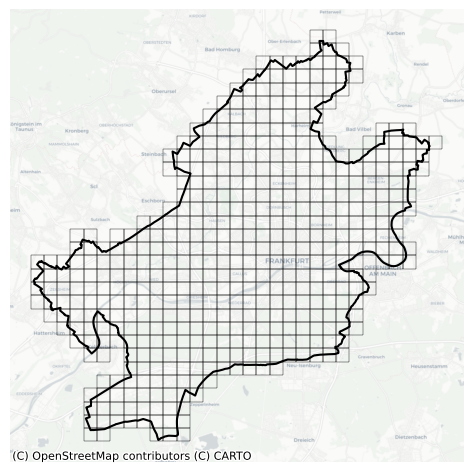

In [5]:
plot_and_save(ffm_sqr_15, 'Squares')

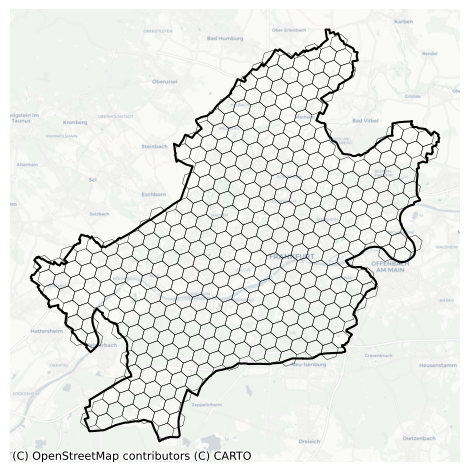

In [6]:
plot_and_save(ffm_hex_8, 'Hexagons')

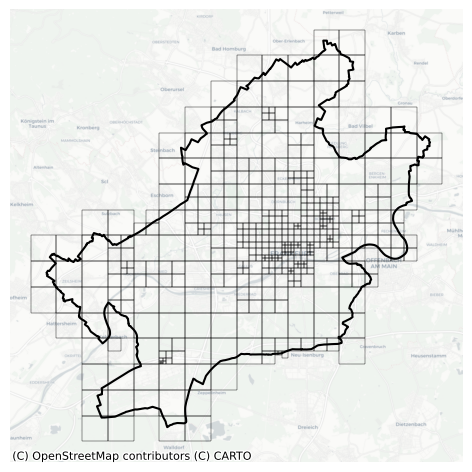

In [7]:
plot_and_save(ffm_asq, 'Adaptive_Squares')

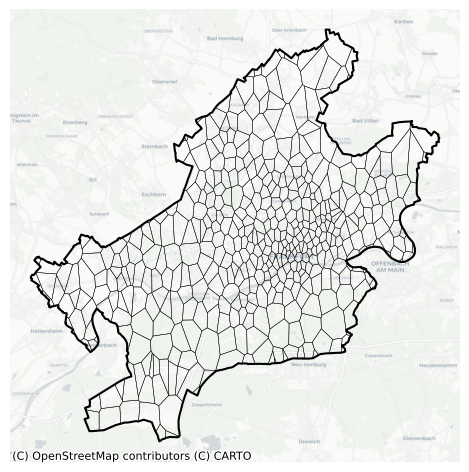

In [8]:
plot_and_save(ffm_voronoi_kmeans, 'Voronoi')

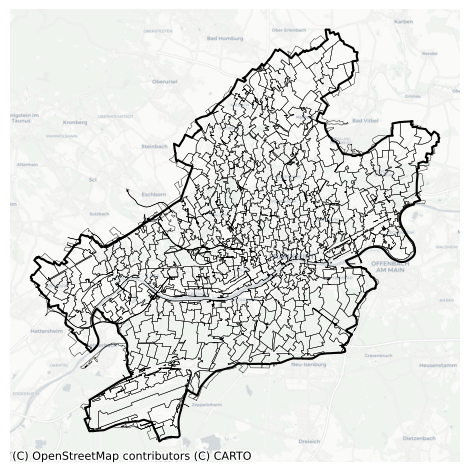

In [9]:
plot_and_save(ffm_cb, 'CB')